In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [2]:
num_points = 2000
vectors_set = []

for i in xrange(num_points) :
    if np.random.random() > 0.5 :
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else :
        vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

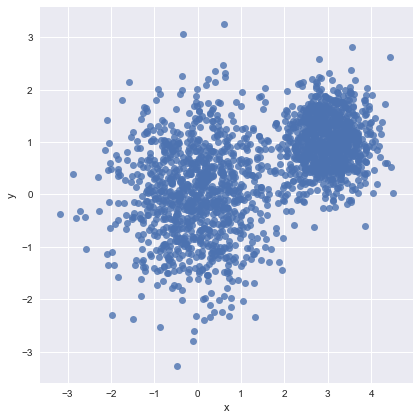

In [3]:
df = pd.DataFrame({"x": [v[0] for v in vectors_set], "y": [v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

* tensorflow에서 위의 데이터를 4개의 cluster로 그룹화 하는 K-Means 알고리즘 구현
* [Shawn Simister가 제안한 모델 참조](https://git.io/vKUFC)

In [7]:
vectors = tf.constant(vectors_set)
k = 4
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k, -1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)
assignments = tf.argmin(tf.reduce_sum(tf.square(tf.sub(expanded_vectors, expanded_centroids)), 2), 0)
means = tf.concat(0, [tf.reduce_mean(tf.gather(vectors,
        tf.reshape(tf.where(tf.equal(assignments, c)),
        [1, -1])), reduction_indices=[1]) for c in xrange(k)])

update_centroids = tf.assign(centroids, means)

init_op = tf.initialize_all_variables()

sess = tf.Session()
sess.run(init_op)

for step in xrange(100) :
    _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

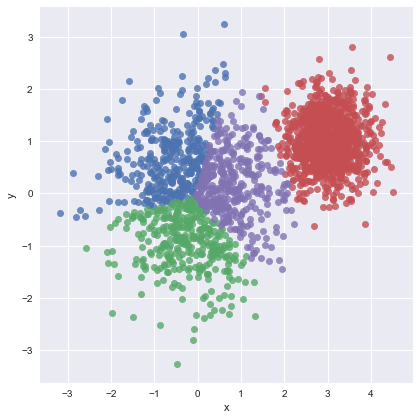

In [8]:
data = {"x": [], "y": [], "cluster": []}

for i in xrange(len(assignment_values)) :
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])

df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()